# Домашнє завдання: Інтерактивні візуалізації з Plotly

## Опис завдання
У цьому домашньому завданні ви будете створювати інтерактивні візуалізації з допомогою бібліотеки Plotly. Ви дізнаєтесь різницю між Plotly Express (швидкі графіки) та Graph Objects (повний контроль), та створите інтерактивний дашборд.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt

In [88]:
data_path = 'drive/MyDrive/Data_analitic/Python/Pandas_Python/yulu_rental.csv'
df = pd.read_csv(data_path)

In [89]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Для plotly краще не встановлювати datetime як індекс
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.day_name()

# Додаємо назви сезонів
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)

## Завдання 1: Базовий інтерактивний лінійний графік (Plotly Express)

**Завдання:**
Створіть інтерактивний лінійний графік динаміки оренди за часом (рівень деталізації - як в даних) з можливістю zoom та hover.

Дайте відповіді на питання.
**Питання для інтерпретації:**
1. Яка перевага інтерактивного графіка над статичним?
2. Чому на графіку є "пробіли" - ділянки, де одна пряма лінія зʼєднує два "суцільних" блоки з даними? Як би ви це могли дослідити на статичному графіку?


In [90]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,season_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,Весна
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,Весна
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,Saturday,Весна
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,Saturday,Весна
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,Saturday,Весна


In [74]:
seasonal_counts = df.groupby('season_name')['count'].sum().sort_values(ascending=False)
print(seasonal_counts)

season_name
Осінь    640662
Літо     588282
Зима     544034
Весна    312498
Name: count, dtype: int64


In [75]:
df['casual'].sum()

np.int64(392135)

In [57]:
df['registered'].sum()

np.int64(1693341)

In [58]:
viz_data = df.reset_index()
viz_data.rename(columns={'index': 'date'}, inplace=True)

In [65]:
px.line(df, x='datetime', y='count',
              title='Інтерактивний графік продажів')

In [76]:
fig = px.line(df, x='datetime', y='count',
              title='Інтерактивний графік оренди велосипедів')
fig.update_traces(line_width=2) #line_color='purple')
fig.update_layout(
    xaxis_title='дата', yaxis_title='кількість оренди',
    hovermode='x unified',
    template='plotly_white',
    height=500
)

In [77]:
df['datetime'] = pd.to_datetime(df['datetime'])  # якщо ще не конвертовано
df.set_index('datetime', inplace=True)  # робимо індексом колонку з датами

daily_count = df['count'].resample('D').sum()


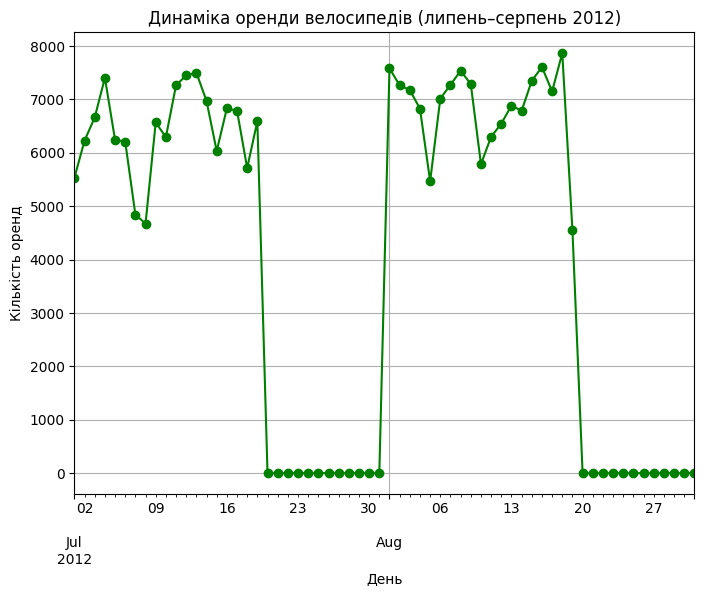

In [78]:
subset = daily_count['2012-07-01':'2012-08-31']

subset.plot(
    kind='line',
    marker='o',
    color='green',
    figsize=(8, 6),
    title='Динаміка оренди велосипедів (липень–серпень 2012)',
    xlabel='День',
    ylabel='Кількість оренд',
    grid=True
)

plt.show()


1. Яка перевага інтерактивного графіка над статичним?
Інтерактивний графік має кілька суттєвих переваг:
- наведення курсору дозволяє побачити точні значення (наприклад, дата й кількість оренд) без додаткових підписів.
- зумування: можна виділити ділянку графіка й збільшити її для детального аналізу.

2. Чому на графіку є "пробіли" - ділянки, де одна пряма лінія зʼєднує два "суцільних" блоки з даними? Як би ви це могли дослідити на статичному графіку?
- такі пробіли виникають через відсутність даних (приблизно, з 19 числа поточного місяця до 1 числа наступного місяця).
- дослідити на статичному графіку складно, бо відсутній зум для детального дослідження. Але, можливо би вивела дані лише за два сусідн місяці, щоб в більшому масштабі подивитися цей пробіл на графіку, подивилася чи є дні з нульово кількісттю оренди, якщо немає, тоді вирахувати кількість днів, що мають дані. Якщо їх менше ніж кількість днів у році, то значить відсутні дані.

## Завдання 2: Scatter plot з додатковими даними (Plotly Express)

**Завдання:**
Створіть scatter plot кількості орендованих велосипедів випадковими користувачами vs кількості орендованих велосипедів зареєстрованими користувачами. Розмір точок встановіть за сумарною кількістю велосипедів, які були взяті в оренду, а колір - за сезоном. В hover_data - додайте деталі, які допоможуть вам в подальшому аналізі.

Дослідіть графік. Зверніть увагу, що ви можете вмикати і вимикати окремі сезони, якщо будете клікати на колір сезону в легенді графіку.

**Дайте відповідь на питання.**
- Як ви проінтерпретуєте роздвоєність цього графіку (дві явні лінії)? Що це означає?
- Які висновки для компанії, які дає велосипеди в оренду, ви можете зробити з цього графіку? 3 основних висновки.

In [51]:
px.scatter(df,
                 x='registered',
                 y='casual'
)


In [47]:
df['year'] = df['datetime'].dt.year

casual_by_year = df.groupby('year')['casual'].sum()
print(casual_by_year)


year
2011    155817
2012    236318
Name: casual, dtype: int64


In [91]:
weather_map = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}


In [92]:
df['weather_name'] = df['weather'].map(weather_map)

In [93]:
season_colors = {
    'Зима': 'skyblue',
    'Весна': 'green',
    'Літо': 'orange',
    'Осінь': 'brown'
}

In [94]:
fig = px.scatter(
    df,
    x='registered',
    y='casual',
    size='count',
    color='season_name',
    color_discrete_map=season_colors,
    hover_data=['holiday', 'workingday', 'weather_name', 'temp', 'datetime'],
    title='Оренди: Випадкові vs Зареєстровані користувачі',
    labels={
        'casual': 'Випадкові користувачі',
        'registered': 'Зареєстровані користувачі',
        'count': 'Кількість оренд',
        'holiday': 'Святковий день',
        'temp': 'Температура',
        'weather_name': 'Погода',
        'workingday': 'Робочий день: 0-ні, 1-так/ '
    }
)

fig.update_layout(template='plotly_white', height=800)
fig.show()


Дайте відповідь на питання.

1. Як ви проінтерпретуєте роздвоєність цього графіку (дві явні лінії)? Що це означає? Це означає наявність двох типів користувачі і різницю між ними в оренді велосипедів.
- перша лінія — ближча до діагоналі (обидва значення зростають): це точки, де кількість оренд від випадкових і зареєстрованих користувачів приблизно однакова.
це вихідні дні або свята, коли більше випадкових оренд, і зареєстровані користувачі теж активні.
- друга лінія — майже "лежить" уздовж осі X або низька по Y: тут зареєстровані користувачі роблять багато оренд, а випадкові — дуже мало або майже жодної.
Це типовий будній день, ранковий/вечірній пік, коли люди їдуть на роботу.
Випадкові користувачі в цей час майже неактивні.

2. Які висновки для компанії, які дає велосипеди в оренду, ви можете зробити з цього графіку? 3 основних висновки.
- надавати бонусні програми для випадкових користувачів, щоб збільши кількість оренди (1+1, система накопичення бонусів), а для зареєстрованих - підписки, персональні пропозиції, програми лояльності.
- найбільша кількість оренди восени, наймена весною. Враховуючи, що весною кількість оренди просідає найбільше, необхідно створити систему заохочення, та проаналізувати можливі причини просідання (відсутні системи знижок чи рекламні акції, сезоні алергії тощо).
- випадкові користувачі, в більшості випадків, охоче орендують велосипеди саме у вихідні дні. Необхідно залучити цих користувачів у будні дні. Можливо, розробити акційні пропозиції: користувач, який приведе друга і той зробить поїздку в будній день, отримає бонус на наступну поіздку, якщо користувач орендує велосипед у вихідні, він отримує бонус,знижку,безкоштовну поїздку в будній день. Це потенційно може перевести випадкових клієнтів в статус зареєстрованих-постіних.

## Завдання 3: Порівняння Plotly Express vs Graph Objects

**Завдання:**
Створіть лінійний графік помісячної динаміки оренди велосипедів двома способами - з Plotly Express та з Graph Objects.

**Дайте відповіді на питання.**
1. Як ви розумієте основну різницю між цими двома підходами?
2. Коли краще використовувати Plotly Express?
3. Коли потрібен Graph Objects?


In [33]:
month = df['month']
month_count = df.groupby('month')['count'].sum()
#month_count = month_count.reset_index()
label_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_count.index = label_months

In [34]:
fig = px.line(month_count.reset_index(), x='index', y='count',
              title='графік оренди велосипедів')
fig.update_traces(line_width=2) #line_color='purple')
fig.update_layout(
    xaxis_title='місяць', yaxis_title='кількість оренди',
    hovermode='x unified',
    template='plotly_white',
    height=500
)
fig.show()

In [35]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=month_count.index,
        y=month_count.values,
        line=dict(color='green', width=3),
        mode='lines+markers',
        name='Оренди по місяцях',
        hovertemplate='Місяць: %{x}<br>Кількість оренди: %{y}<extra></extra>'
    )
)

# Заміна числових міток на назви місяців
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(0, 12)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    template='plotly_white'
)


fig.show()

1. Як ви розумієте основну різницю між цими двома підходами?
Plotly Express - це більш простий та швидкий інструмент для побудови графіків. Він ідеально підходить для базових візуалізацій і потребує мінімум коду. Graph Objects (go) - більш гнучкий і складніший у використанні. Можливо більше використовувати налаштувань, додавати певні кольори, побудови складних дашбордів.

2. Коли краще використовувати Plotly Express?
Коли потрібно:
- швидко побудувати графік для аналізу;
- подивитися загальну картину або провести первинний аналіз;
- не потрібно складних налаштувань (колір, кілька осей тощо).

3. Коли потрібен Graph Objects?
Коли потрібно:
- створити складну або кастомізовану візуалізацію;
- побудувати дашборд з кількох графіків;
- точно налаштувати кольори, підписи, легенду.

## Завдання 4: Дашборд з make_subplots (Graph Objects)

**Завдання:**
Створіть дашборд з 4 різними графіками в одній фігурі:
- Bar chart - середні значення загальної кількості оренд велосипедів за сезонами
- Pie chart - відсоткове співвідношення погодних умов в даних
- Line chart - середнє значення загальної кількості оренд велосипедів за годинами протягом доби
- Scatter plot - кореляція температури vs вологість

Додайте заголовок на дашборд.

**Дайте відповідь на питання**
- На ваш погляд, яка перевага об'єднання графіків в один дашборд?

In [36]:
season_mean = df.groupby('season_name')['count'].mean().reset_index()
humidity = df['humidity']
temp = df['temp']
count= df['count']
weather_day = df['weather'].value_counts().reset_index()
colors_c=['#FFD700','#808080','#87CEFA','#0000FF']
labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
hour_mean = df.groupby('hour')['count'].mean().reset_index()
season_colors = {
    'Весна': 'green',
    'Літо': 'red',
    'Осінь': 'orange',
    'Зима': 'skyblue'
}

colors = season_mean['season_name'].map(season_colors)


In [37]:
df.groupby('season')['count'].mean().reset_index()

,season,count
0,1,116.343261
1,2,215.251372
2,3,234.417124
3,4,198.988296


In [38]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Середня кількість оренд за сезонами',
        'Середня кількість оренди по годинах',
        'Відсоткове співвідношення погодних умов',
        'Кореляція температури vs вологість'
    ),
    specs=[[{"type": "bar"}, {"type": "scatter"}],
           [{"type": "domain"}, {"type": "scatter"}]] )

# Графік 1: Bar chart
fig.add_trace(
    go.Bar(
        x=season_mean['season_name'],
        y=season_mean['count'],
        name='Оренди за сезонами',
        marker_color=colors,
        text=season_mean['count'].round(2),
        textposition='auto',
        hovertemplate='Сезон: %{x}<br>Середня оренда: %{y:.2f}<extra></extra>'
    ),
    row=1, col=1
)

#Графік 2: Pie chart
fig.add_trace(
    go.Pie(
        labels=labels[:len(weather_day)],
        values=weather_day['count'],
        hole=0.4,
        textinfo='label',
        marker=dict(colors=colors_c),  # список кольорів, що співпадає за довжиною з labels
        hovertemplate='%{label}: %{percent:.1%}<extra></extra>'
    ),
    row=2, col=1
)

# Графік 3: Лінійний
fig.add_trace(
    go.Scatter(
        x=hour_mean['hour'],
        y=hour_mean ['count'],
        line=dict(color='green', width=3),
        mode='lines+markers',
        name='Оренди по годинах',
        hovertemplate='Година: %{x}<br>Середня оренда: %{y:.2f}<extra></extra>'
    ),
    row=1, col=2
)

#Графік 4: Scatterplot
fig.add_trace(
    go.Scatter(
        x=temp,
        y=humidity,
        mode='markers',
        marker=dict(
            size=6,
            color=count,
            colorscale='RdYlGn',
            reversescale=True,
            showscale=True,
            colorbar=dict(title='Кількість оренди')
        ),
        hovertemplate='Темп: %{x}<br>Вологість: %{y}<br>Оренди: %{marker.color}<extra></extra>'
    ),
    row=2, col=2
)

fig.update_layout(
    height=1000,
    showlegend=False,
    title_text='Комплексний дашборд оренд велосипедів',
    template='plotly_white'
)

fig.show()

На мій погляд, основна перевага об'єднання графіків в один дашборд полягає в тому, що вся ключова інформація зібрана в одному місці. Це дозволяє швидко оцінити/проаналізувати загальну картину без необхідності перемикатися між різними візуалізаціями чи вкладками.

## Завдання 5: 3D візуалізація

**Завдання:**
Створіть 3D scatter plot для аналізу взаємозв'язку температури, швидкості вітру та загальної кількості орендованих велосипедів. Колір встановіть за сезоном, а розмір - за загальною кількість оренд також.

Дайте відповіді на питання.
**Питання для інтерпретації:**
1. Яку додаткову інформацію, на ваш погляд, дає 3D візуалізація?
2. Чи видно кластери в 3D просторі?
3. Чи ви можете зробити висновки з цієї візуалізації, чи вам було простіше побудувати кілька 2D?



In [39]:
fig = px.scatter_3d(
    df.sample(800).reset_index(drop=True),
    x='temp',
    y='windspeed',
    z='count',
    color='season_name',
    size='count',
    title='3D аналіз оренди велосипедів',
    color_discrete_map=season_colors  # 👈 передаємо свої кольори
)

# Оформлення
fig.update_layout(
    height=800,
    scene=dict(
        xaxis_title='Температура',
        yaxis_title='Швидкість вітру',
        zaxis_title='Кількість оренд'
    ),
    template='plotly_white'
)

fig.show()

1. Яку додаткову інформацію, на ваш погляд, дає 3D візуалізація?
3D-візуалізація надає додатковий об’єм і глибину для аналізу. Завдяки можливості повертати графік, можна розглядати дані з різних кутів і бачити проєкції точок на різні площини. Це допомагає краще оцінити, наскільки дані згруповані або розкидані в просторі.

2. Чи видно кластери в 3D просторі?
Так, кластери помітні. Видно, що для певних поєднань температури й швидкості вітру кількість оренд зростає або знижується. Також можна спостерігати скупчення точок в окремих діапазонах.

3. Чи ви можете зробити висновки з цієї візуалізації, чи вам було простіше побудувати кілька 2D?
Хоча 3D графік виглядає ефектно та дозволяє дослідити багатовимірні залежності, мені особисто зручніше аналізувати дані за допомогою 2D scatter plot із додатковими налаштуваннями, наприклад, через колір і розмір маркерів. У 2D легше зчитувати конкретні значення й порівнювати відстані між точками.


## Завдання 6: Експорт та збереження інтерактивних графіків

**Завдання:**
Збережіть побудований раніше дашборд в формат HTML. Також змініть вручну щось на дашборді (зум, виділення частини графіку) і збережіть його як статичне зображення через іконку фотоапарату у формат PNG. Завантажте файли з дашбордом у HTML та PNG (або посилання на них на github) разом з посиланням на цей ноутбук при здачі ДЗ.


In [ ]:
fig.write_html("dashboard.html")

Посилання на дашборд /Users/irynal/Downloads/dashboard.html


In [ ]:
pip install -U kaleido